<a href="https://colab.research.google.com/github/Srouek/Algo/blob/main/M1_eval_DataVisualisation_St%C3%A9phane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyse des programme proposé par Netflix


In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Notebooks'
netflix_data = pd.read_csv(root_path+"/DataSources/netflix_titles.csv", sep=",")
print("dataset loaded")
netflix_data.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
dataset loaded


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [ ]:
netflix_data.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,6.234000e+03,6234,6234,4265,5664,5758,6223,6234.00000,6224,6234,6234,6234
unique,NaN,2,6172,3301,5469,554,1524,NaN,14,201,461,6226
top,NaN,Movie,Tunnel,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,NaN,4265,3,18,18,2032,122,NaN,2027,1321,299,3
mean,7.670368e+07,NaN,NaN,NaN,NaN,NaN,NaN,2013.35932,NaN,NaN,NaN,NaN
std,1.094296e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.81162,NaN,NaN,NaN,NaN
min,2.477470e+05,NaN,NaN,NaN,NaN,NaN,NaN,1925.00000,NaN,NaN,NaN,NaN
25%,8.003580e+07,NaN,NaN,NaN,NaN,NaN,NaN,2013.00000,NaN,NaN,NaN,NaN
50%,8.016337e+07,NaN,NaN,NaN,NaN,NaN,NaN,2016.00000,NaN,NaN,NaN,NaN
75%,8.024489e+07,NaN,NaN,NaN,NaN,NaN,NaN,2018.00000,NaN,NaN,NaN,NaN


In [78]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6234 non-null   int64         
 1   type          6234 non-null   object        
 2   title         6234 non-null   object        
 3   director      4265 non-null   object        
 4   cast          5664 non-null   object        
 5   country       5758 non-null   object        
 6   date_added    6223 non-null   datetime64[ns]
 7   release_year  6234 non-null   int64         
 8   rating        6224 non-null   object        
 9   duration      6234 non-null   object        
 10  listed_in     6234 non-null   object        
 11  description   6234 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 584.6+ KB


## 1.Les caratéristique de la donnée
La donnée se compose de programe:
  1.   le type de programme
  2.   Le nom du producteur
  3.   Le casting (le nom des acteur principaux)
  4.   Le pays d'origine du film 
  5.   La date d'ajout au catalogue netflix
  6.   La date de sortis du programme 
  7.   Le rating qui est la note
  8.   La durée du programme
  9.   Les catégorie dans lesquelles le programme est listé
  10.  Une description du programme





In [ ]:
netflix_data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

## 2.le premier axe d'analyse 
On peut voir que les programmes proposé sont catégorisés en deux types, les "movie"(film) et les "Tv Show"(programme télévisé composé de plusieurs épisode, tout type confondu)



Text(0.5, 1.0, 'Type de programme sur Netflix')

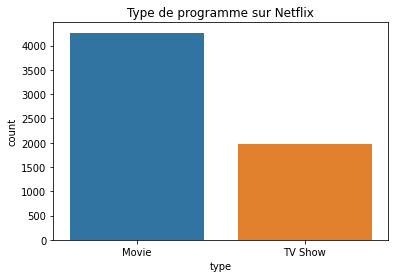

In [79]:
#Comparaison des type de programme
sns.countplot(x='type', data=netflix_data)
plt.title("Type de programme sur Netflix")

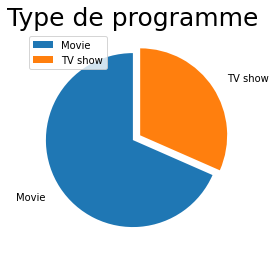

In [80]:
labels = ['Movie', 'TV show']
size = netflix_data['type'].value_counts()
explode = [0, 0.1]
plt.pie(size,labels=labels,explode = explode, startangle=90, labeldistance=1.2 )
plt.title('Type de programme', fontsize = 25)
plt.legend()
plt.show()


Netflix a deux fois plus de film que de Tv show à son catalogue

In [ ]:
netflix_data['date_added'].unique()

array(['2019-09-09T00:00:00.000000000', '2016-09-09T00:00:00.000000000',
       '2018-09-08T00:00:00.000000000', ...,
       '2017-04-20T00:00:00.000000000', '2014-04-01T00:00:00.000000000',
                                 'NaT'], dtype='datetime64[ns]')

Text(0.5, 1.0, "Nombre d'ajout par ans pour les types Movie and TV Show")

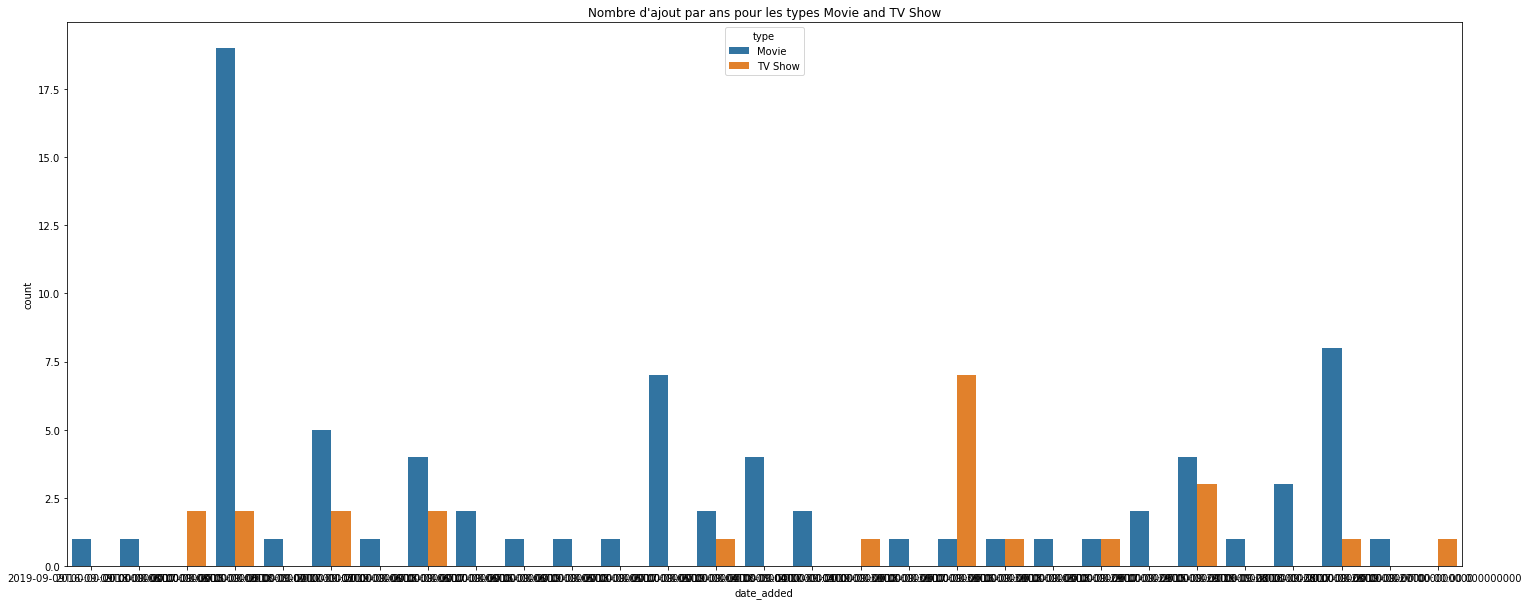

In [ ]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added']) # On transforme au format date time
plt.figure(figsize = (25,10))
sns.countplot(x=netflix_data.date_added[:100],data = netflix_data,hue='type',)
plt.title("Nombre d'ajout par ans pour les types Movie and TV Show")

Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

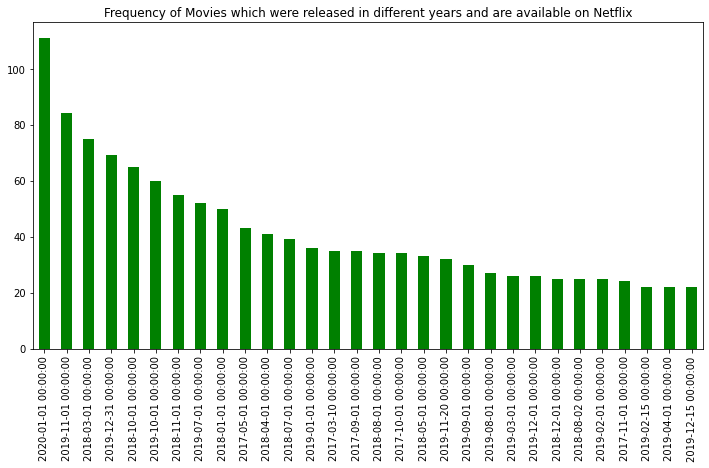

In [ ]:
plt.figure(figsize=(12,6))
netflix_data[netflix_data["type"]=="Movie"]["date_added"].value_counts()[:30].plot(kind="bar",color="green")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")

### 2.1 Analyse des programe de type movie


In [ ]:
#On créer un jeu de donnée différend entre les movie et les Tv show
movie = netflix_data[netflix_data['type'] == 'Movie'].copy()
movie.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


In [ ]:
movie.count()

show_id         4265
type            4265
title           4265
director        4137
cast            3905
country         4070
date_added      4264
release_year    4265
rating          4257
duration        4265
listed_in       4265
description     4265
dtype: int64

On peut voir que le catalogue est composé de 4265 programme de type movie, mais que les colonne director, cast et country possède bien moins de donnée unique.
Nous pouvons donc vérifier si ses donnée possède des valeurs dupliqué.
### 2.2 étude des valeurs dupliqué pour les programme de type movie


Text(0.5, 1.0, 'Top 20 des pays ayant des film aux catalogue Netflix')

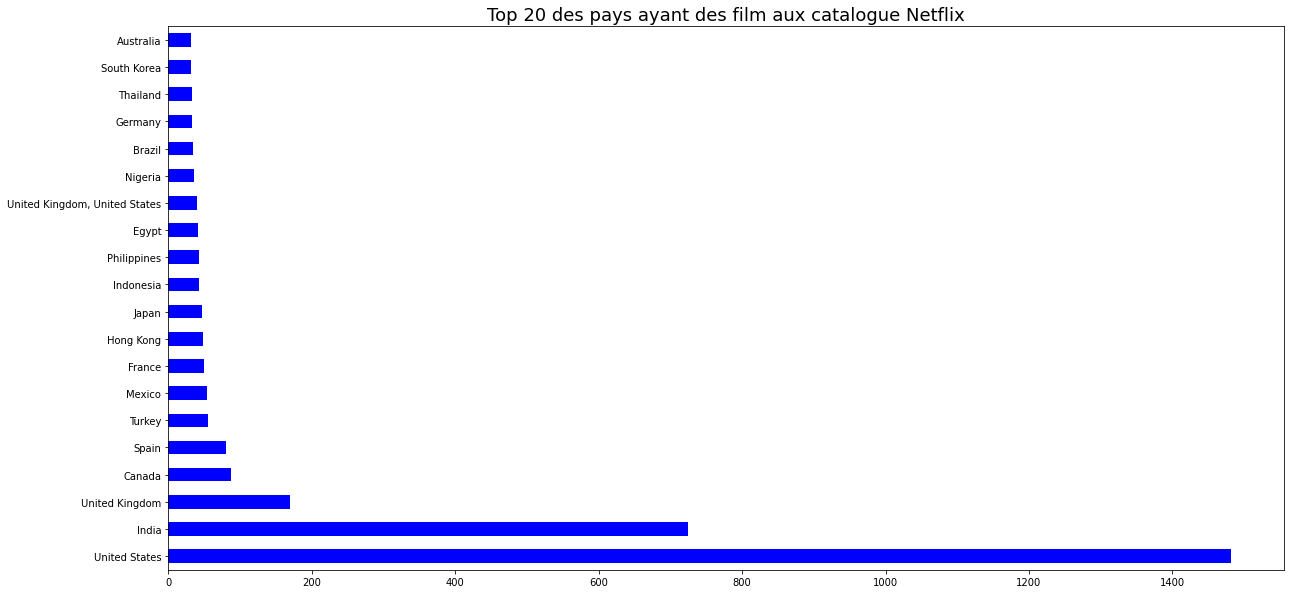

In [ ]:
plt.figure(figsize=(20,10))
movie["country"].value_counts()[:20].plot(kind="barh",color="blue")
plt.title("Top 20 des pays ayant des film aux catalogue Netflix",size=18)

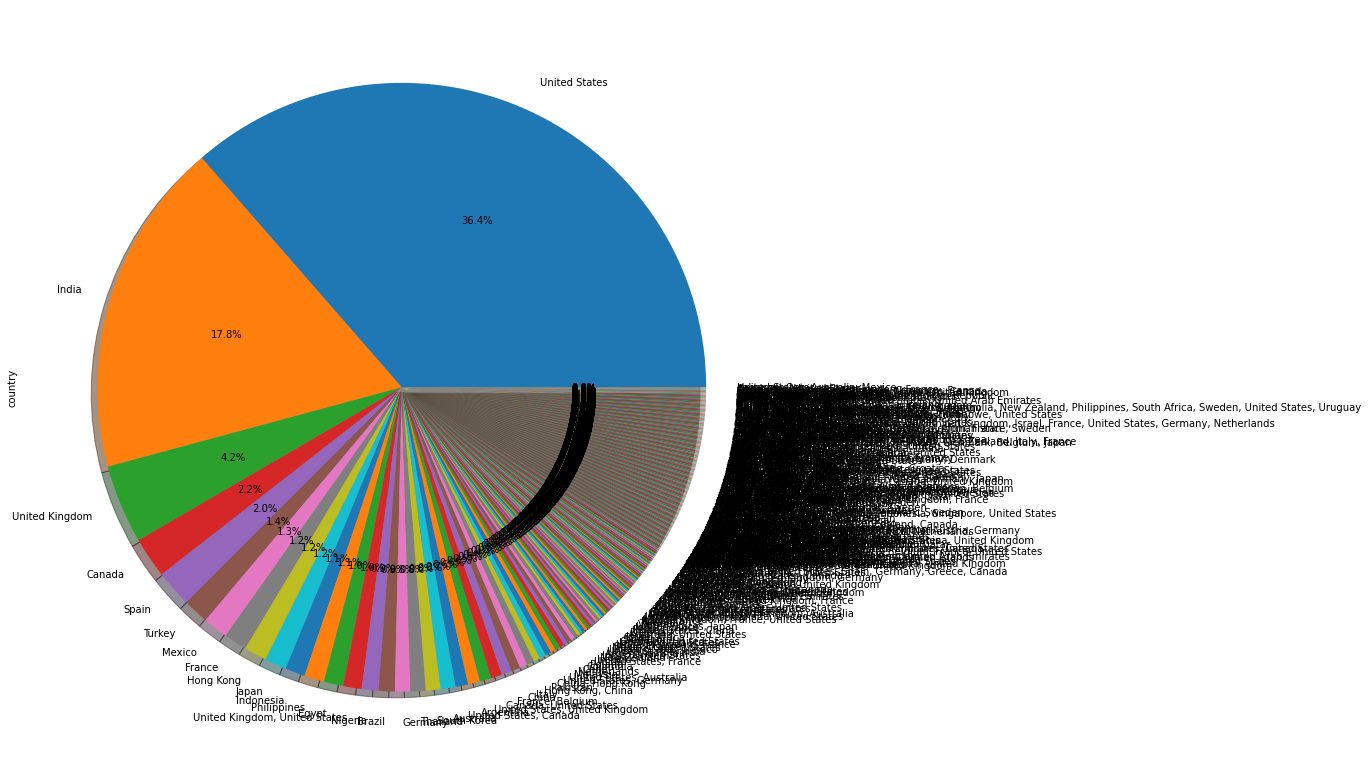

In [88]:
total_movie = movie.show_id.count()

movie['country'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(20,14))
plt.show()

La majorité des programme de type movie viennent des Etats-Unis
Ils occupe 36% du catalogue de netflix, suivit par les film indienà 18%

Un

In [ ]:
tv_show = netflix_data[netflix_data['type'] == 'TV Show'].copy()
tv_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,NaN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...


In [ ]:
tv_show.duration.unique()

array(['1 Season', '2 Seasons', '5 Seasons', '3 Seasons', '7 Seasons',
       '4 Seasons', '8 Seasons', '6 Seasons', '9 Seasons', '14 Seasons',
       '10 Seasons', '12 Seasons', '15 Seasons', '11 Seasons',
       '13 Seasons'], dtype=object)

In [ ]:
tv_show.count()

show_id         1969
type            1969
title           1969
director         128
cast            1759
country         1688
date_added      1959
release_year    1969
rating          1967
duration        1969
listed_in       1969
description     1969
dtype: int64

## Analyse du nombre de sortie de programme 


<Figure size 1008x576 with 0 Axes>

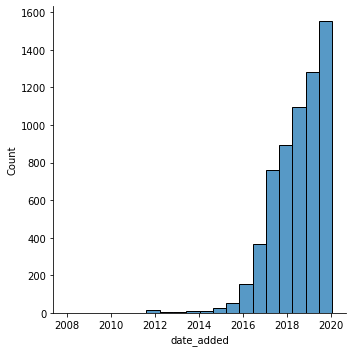

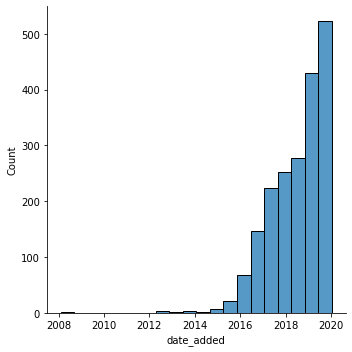

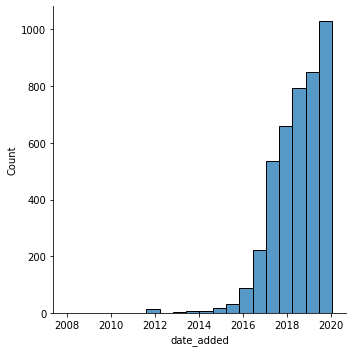

In [ ]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added']) # On transforme au format date time
movie['date_added'] = pd.to_datetime(movie['date_added'])
tv_show['date_added'] = pd.to_datetime(tv_show['date_added'])

#On affiche le nombre de films posté en fonction de la date 
plt.figure(figsize=(14,8))
sns.displot(netflix_data.date_added, bins=20, kde=False, label='Total')
sns.displot(tv_show.date_added, bins=20, kde=False)
sns.displot(movie.date_added, bins=20, kde=False)

### Les ajouts en de film en fonction de leur date de sortis

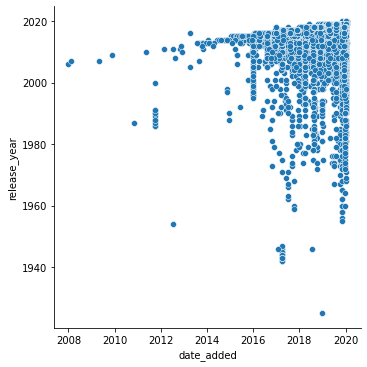

In [ ]:
sns.relplot( x= "date_added",y= "release_year", data= netflix_data)